# 基于回归分析的大学综合得分预测

## 1.案例简介

大学排名的问题具有显著的重要性，同时也充满了挑战和争议。一所大学的全方位能力包括科研、师资和学生等多个因素。现在，全球有多达百家的评估机构致力于评估并排列大学的综合评分，然而，这些机构的评分结果经常存在不一致的情况。在这些机构当中，世界大学排名中心（Center for World University Rankings，简称CWUR）以其评估教育质量、校友就业、研究产出和引用，而非依赖调查和大学提交的数据的方式而著名，其影响力十分显著。
在本项目中，我们将依据CWUR提供的全球知名大学的各项排名（包括师资和科研等）来进行工作。一方面，我们将通过数据可视化来探究各个大学的独特性。另一方面，我们希望利用机器学习模型（例如线性回归）来预测大学的综合得分。

## 2.作业说明
我们将使用Kaggle的数据集，利用线性回归模型，依据大学各项排名的指标来预测其综合得分。可以使用 sk-learn 等第三方库，不要求自己实现线性回归.

基础任务（80分）：
- 1.观察和可视化数据，揭示数据的特性。
- 2.训练集和测试集应按照7:3的比例随机划分，采用RMSE（均方根误差）作为模型的评估标准，计算并获取测试集上的线性回归模型的RMSE值。
- 3.对线性回归模型中的系数进行分析。
- 4.尝试使用其他类型的回归模型，并比较其效果。

进阶任务（20分）：
- 1.尝试将地区的离散特征融入到线性回归模型中，然后比较并分析结果。
- 2.利用R2指标和VIF指标进行模型评价和特征筛选, 尝试是否可以增加模型精度。

## 3. 数据展示

In [44]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)  # 设置显示最大行
np.set_printoptions(threshold=10)

data_df = pd.read_csv('./cwurData.csv')  # 读入 csv 文件为 pandas 的 DataFrame
data_df.head(15) # 观察前几行

,world_rank,institution,region,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,11,University of Chicago,USA,9,15,26,8,34,20,28,NaN,101,73.82,2012
11,12,Cornell University,USA,10,21,42,14,22,21,16,NaN,10,73.69,2012
12,13,University of Pennsylvania,USA,11,31,16,24,9,10,8,NaN,9,73.64,2012
13,14,University of Tokyo,Japan,1,32,19,31,8,19,23,NaN,3,69.49,2012



---
---
# <center>答案区</center>

In [45]:
#查看是否有缺失值,并且删除nan
# data_df.info()
print("处理之前数据为:{}条".format(len(data_df)))
data_df = data_df.dropna()
print('处理之后数据为:{}条'.format(len(data_df)))

处理之前数据为:2200条
处理之后数据为:2000条


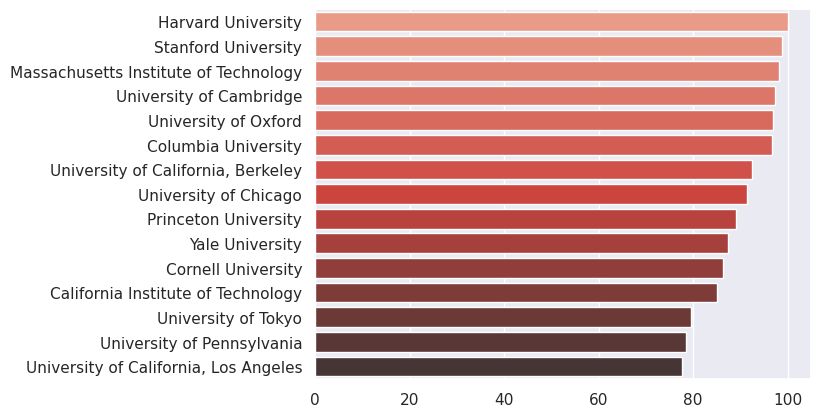

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
data_df1=data_df
data_df1=data_df1.drop("region",axis=1)
mean_df = data_df1.groupby('institution').mean() # 按学校聚合并对聚合的列取平均
top_df = mean_df.sort_values(by='score', ascending=False).head(15)  # 取前15学校
sns.set()
x1 = top_df['score'].values  # 综合得分列表
y1 = top_df.index.values  # 学校名称列表
sns.barplot(x=x1, y=y1, palette="Reds_d")  # 画条形图
plt.show()

In [47]:
data_df.columns

Index(['world_rank', 'institution', 'region', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 选择重要的特征
features = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment','influence', 'quality_of_education', 'broad_impact', 'patents']
X = data_df[features]
# 拿score当标签
Y = data_df['score']
y = Y.values
x = X.values
#将数据分为训练集与测试集 分成7:3,并且打乱
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

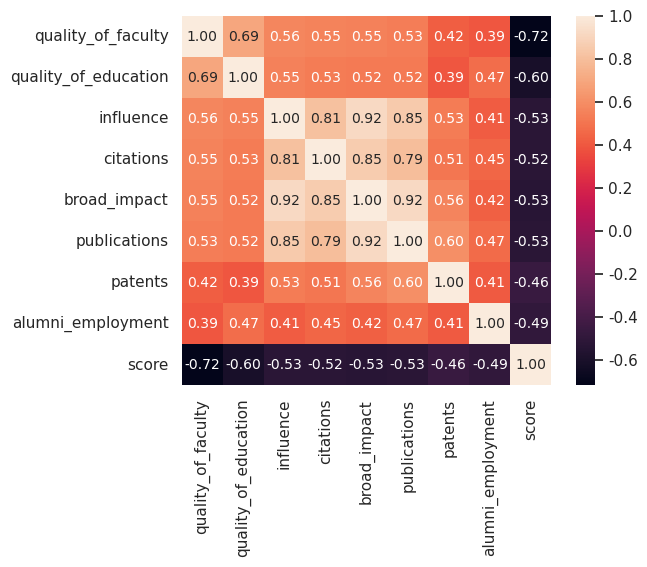

In [49]:
# 观察变量之间的关联关系
corrs = data_df[features + ["score"]].corr()
cols = corrs.nlargest(9, 'quality_of_faculty')["quality_of_faculty"].index
cm = np.corrcoef(data_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [50]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
# 查看RMSE评估 squared为False则使用RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)
print("模型系数为:{},".format(list(model.coef_)))

RMSE: 4.208907870633926
模型系数为:[-0.06497484520815332, 0.0007379371455894624, 3.0134406693253765e-06, -0.006552911190873099, 0.0007773985373007419, -0.006501369543779862, -0.0031647634570518817, -0.00229526434574986],


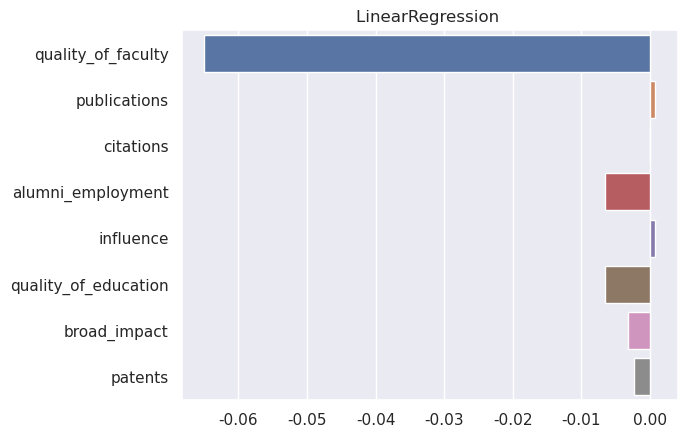

In [51]:
# 观察模型系数
sns.barplot(x=model.coef_, y=features) 
plt.rcParams['axes.unicode_minus'] = False
plt.title("LinearRegression ")
plt.show()

In [52]:
# 使用别的回归模型
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(x_train, y_train)
y_la_pred = lasso.predict(x_test)
la_rmse = mean_squared_error(y_test, y_la_pred, squared=False)
print("RMSE:", la_rmse)
print("模型系数为:{},".format(list(lasso.coef_)))

RMSE: 4.206434880551881
模型系数为:[-0.06438806842338507, 0.0005677572127327858, -0.0, -0.006518426457271726, 0.0006023510830517153, -0.006514121983608108, -0.0029039241555367506, -0.0022776739729580033],


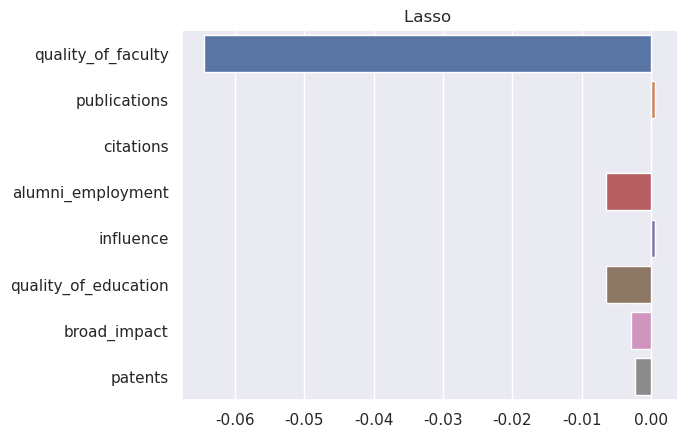

In [53]:
sns.barplot(x=lasso.coef_, y=features)
plt.title("Lasso ")
plt.show()

In [54]:
# # 加入地区特征
# 定义特征列表
features = ['quality_of_faculty', 'publications', 'citations', 'alumni_employment', 
                'influence', 'quality_of_education', 'broad_impact', 'patents', 'region']
# 选择特征和目标变量
X = data_df[features]
Y = data_df['score']
# 获取地区列表
places = X['region'].unique()
# 遍历地区列表
for place in places:
    # 获取该地区的数据索引
    idxs = X[X['region']==place].index
    # 计算该地区的平均分数
    avg = np.mean(Y.loc[idxs])
    # 根据平均分数将地区分为三类
    if avg >= 70:
        tmp = 1
    elif avg >= 50:
        tmp = 2
    else:
        tmp = 3
    # 将地区替换为类别
    X = X.replace(place,tmp)
# 划分训练集和测试集
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.3, shuffle=True)
# 定义线性回归模型
model1=LinearRegression()
lasso1 = Lasso(alpha=1.0)

# 训练模型
model1.fit(x_train1,y_train1)
lasso1.fit(x_train1, y_train1)

# 预测模型
y_pred1=model1.predict(x_test1)
y_la_pred1 = lasso1.predict(x_test1)
rmse1 = mean_squared_error(y_test1, y_pred1, squared=False)
la_rmse1 = mean_squared_error(y_test1, y_la_pred1, squared=False)
print("LinearRegression RMSE:", la_rmse)
print("Lasso RMSE:", la_rmse1)


LinearRegression RMSE: 4.206434880551881
Lasso RMSE: 3.97708486733202


### 利用R2指标和VIF指标进行模型评价和特征筛选, 尝试是否可以增加模型精度

在线性回归中，参数R2（R-squared）是一种衡量模型拟合优度的统计指标。R2的取值范围在0到1之间，越接近1表示模型对观测数据的解释能力越强，拟合效果越好。

VIF（Variance Inflation Factor）是用于评估线性回归模型中自变量之间多重共线性（multicollinearity）程度的统计指标。多重共线性指的是自变量之间存在高度相关性，可能导致模型的解释能力下降或不可靠的参数估计。

特征筛选：根据VIF值进行特征筛选。可以选择以下策略之一：

删除VIF值较高的自变量：如果某个自变量的VIF值超过阈值，可以将其从模型中剔除。这样可以消除多重共线性的影响，提高模型的稳定性和解释能力。然后重新构建线性回归模型。

保留一个相关性较强的自变量：如果多个自变量之间存在高度相关性，可以选择保留其中一个，并将其他相关的自变量剔除。这样可以减少共线性问题，同时保留对因变量解释能力较强的特征。

进行变量转换：如果某些自变量之间存在共线性，但它们对于模型的解释能力都很重要，可以考虑对这些自变量进行变量转换，例如通过主成分分析（PCA）降维或者使用其他线性变换方法。

In [55]:
#计算出损失函数的值
mse = np.mean((y_pred1 - y_test1) ** 2)
rmse = np.sqrt(mse)
print("MSE的值: %.4f" %mse)
print("RMSE的值: %.4f" %rmse)
print("MAE的值：%.4f" % np.mean(np.absolute(y_test1-y_pred1)))
r2 = (1-mse/np.var(y_test1))
print("R2得分: %.4f" %r2)

MSE的值: 15.7991
RMSE的值: 3.9748
MAE的值：2.0394
R2得分: 0.6114


In [56]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

def calVIF(features):
    # 将特征矩阵添加一个常数列
    features = add_constant(features)
    # 创建一个 DataFrame 存储 VIF 值
    vif = pd.DataFrame()
    # 添加特征列和对应的 VIF 值
    vif['Features'] = features.columns
    vif['VIF'] = [variance_inflation_factor(features.values, idx) for idx in range(features.shape[1])]
    # 输出包含特征和对应 VIF 值的 DataFrame
    print(vif)

# 调用 calVIF 函数计算多重共线性
calVIF(X)



               Features        VIF
0                 const  51.605118
1    quality_of_faculty   2.188333
2          publications   7.749074
3             citations   3.963019
4     alumni_employment   1.507796
5             influence   6.723623
6  quality_of_education   2.213767
7          broad_impact  13.075656
8               patents   1.672295
9                region   1.303162


In [57]:
# 划分训练集和测试集
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.3, shuffle=True)
# 定义线性回归模型
model1=LinearRegression()

# 训练模型
model1.fit(x_train1,y_train1) 

# 预测模型
y_pred1=model1.predict(x_test1) 
rmse1 = mean_squared_error(y_test1, y_pred1, squared=False) 
print("LinearRegression RMSE:", rmse1) 

# 删除VIF值大于5的特征
drop_data = X.drop(columns=[ 'broad_impact', 'publications', 'influence'])

# 调用 calVIF 函数计算多重共线性
calVIF(drop_data)

# 划分训练集和测试集
x_train2, x_test2, y_train2, y_test2 = train_test_split(drop_data, Y, test_size=0.3, shuffle=True)
 
# 训练模型
model1.fit(x_train2,y_train2) 

# 预测模型
y_pred2=model1.predict(x_test2) 
rmse1 = mean_squared_error(y_test2, y_pred2, squared=False) 
print("LinearRegression RMSE with drop:", rmse1) 

LinearRegression RMSE: 4.422299727450778
               Features        VIF
0                 const  47.799567
1    quality_of_faculty   2.168512
2             citations   1.820813
3     alumni_employment   1.453801
4  quality_of_education   2.167140
5               patents   1.473288
6                region   1.161255
LinearRegression RMSE with drop: 4.080421603843897
